<a href="https://colab.research.google.com/github/jasdeepbajaj/Image_Captioning/blob/main/Image_Captioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import os
import sys
from pycocotools.coco import COCO
import urllib
import zipfile

import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
nltk.download('punkt')

import torch
import torch.utils.data as data
from PIL import Image
import numpy as np
from tqdm import tqdm
import random
import json
import pickle

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [46]:
os.makedirs('opt' , exist_ok=True)
os.chdir( '/content/opt' )
!git clone 'https://github.com/cocodataset/cocoapi.git'

fatal: destination path 'cocoapi' already exists and is not an empty directory.


In [47]:
os.chdir('/content/opt/cocoapi')

# Download the annotation :
annotations_trainval2014 = 'http://images.cocodataset.org/annotations/annotations_trainval2014.zip'
image_info_test2014 = 'http://images.cocodataset.org/annotations/image_info_test2014.zip'

urllib.request.urlretrieve(annotations_trainval2014 , filename = 'annotations_trainval2014.zip' )
urllib.request.urlretrieve(image_info_test2014 , filename= 'image_info_test2014.zip' )

('image_info_test2014.zip', <http.client.HTTPMessage at 0x7b2af019add0>)

In [48]:
with zipfile.ZipFile('annotations_trainval2014.zip' , 'r') as zip_ref:
  zip_ref.extractall( '/content/opt/cocoapi'  )

try:
  os.remove( 'annotations_trainval2014.zip' )
  print('zip removed')
except:
  None

with zipfile.ZipFile('image_info_test2014.zip' , 'r') as zip_ref:
  zip_ref.extractall( '/content/opt/cocoapi'  )

try:
  os.remove( 'image_info_test2014.zip' )
  print('zip removed')
except:
  None

zip removed
zip removed


In [50]:
dataDir = '/content/opt/cocoapi'
dataType = 'val2014'
instances_annFile = os.path.join(dataDir, 'annotations/instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)

captions_annFile = os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=9.88s)
creating index...
index created!
loading annotations into memory...
Done (t=1.15s)
creating index...
index created!


http://images.cocodataset.org/val2014/COCO_val2014_000000400046.jpg


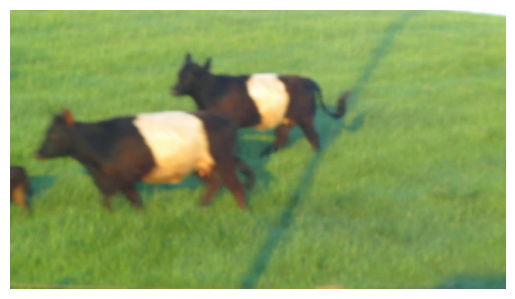

A couple of brown cows walking across a green field.
a couple of cows are running around in a field
Black and white cows in a green field.
A blurry photo shows  black and multicolored cows  trotting across a pasture bisected by a shadow line. 
The black and white cows are running in the grass.


In [53]:
# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

In [ ]:
class Vocabulary(object):
  def __init__(self,
               vocab_threshold,
               vocab_file="./vocab.pkl",
               start_word = "",
               end_word = "",
               unk_word = "",
               annotations_file = "../cocoapi/annotations/captions_train2014.json",
               vocab_from_file = False):

    self.vocab_threshold = vocab_threshold
    self.vocab_file = vocab_file
    self.start_word = start_word
    self.end_word = end_word
    self.unk_word = unk_word
    self.annotations_file = annotations_file
    self.vocab_from_file = vocab_from_file
    self.get_vocab()

  def get_vocab(self):
    """Load the vocabulary from file or build the vocabulary from scratch"""
    if os.path.exists(self.vocab_file) and self.vocab_from_file:
      with open(self.vocab_file, 'rb') as f:
        vocab = pickle.load(f)
        self.word2idx = vocab.word2idx
        self.idx.word = vocab.idx2word
      print("Vocabulary Successfully Loaded from vocab.pkl file")

    else:
      self.build_vocab()
      # with open(self.vocab_file, 'wb') as f:
      #   pickle.dump(self, f)
      # print("Vocabulary Successfully Saved to vocab.pkl file")

  def build_vocab(self):
    self.init_vocab()

  def init_vocab(self):
    """Initialize the dictionaries for converting tokens to integers (and vice-versa)."""
    self.word2idx = {}
    self.idx2word = {}
    self.idx = 0

  def add_word(self, word):
    if not word in self.word2idx:
      self.word2idx[word] = self.idx
      self.idx2word[self.idx] = word
      self.idx += 1



In [ ]:
class CoCoDataset(data.Dataset):
  def __init__(self, transform, mode, batch_size, vocab_threshold, vocab_file, start_word, end_word,
               unk_word, annotations_file, vocab_from_file, img_folder):
    self.transform = transform
    self.mode = mode
    self.batch_size = batch_size
    pass
